In [44]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import altair as alt
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from data_handler import import_adult_data, column_statistics
from plot_handler import univariate_analysis_numeric, univariate_analysis_nominal, correlation_matrix, boxplot_single, boxplot_grouped, barplot_grouped
#from classifier_handler import full_report, fit_grid_clf, report_params

import locale
from locale import atof
locale.setlocale(locale.LC_NUMERIC, '')

'de_DE.UTF-8'

In [45]:
df_alpha = pd.read_csv('./data/meanPSD_Alpha.txt', delim_whitespace=True, error_bad_lines=False)
df_beta1 = pd.read_csv('./data/meanPSD_Beta1.txt', delim_whitespace=True, error_bad_lines=False)
df_beta2 = pd.read_csv('./data/meanPSD_Beta2.txt', delim_whitespace=True, error_bad_lines=False)
df_gamma = pd.read_csv('./data/meanPSD_Gamma.txt', delim_whitespace=True, error_bad_lines=False)
df_delta = pd.read_csv('./data/meanPSD_Delta.txt', delim_whitespace=True, error_bad_lines=False)
df_theta = pd.read_csv('./data/meanPSD_Theta.txt', delim_whitespace=True, error_bad_lines=False)

/Users/paulinehubner/q/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 13: expected 22 fields, saw 23\nSkipping line 1710: expected 22 fields, saw 23\n'
b'Skipping line 13: expected 22 fields, saw 23\nSkipping line 1710: expected 22 fields, saw 23\n'
b'Skipping line 13: expected 22 fields, saw 23\nSkipping line 1710: expected 22 fields, saw 23\n'
b'Skipping line 13: expected 22 fields, saw 23\nSkipping line 1710: expected 22 fields, saw 23\n'
b'Skipping line 13: expected 22 fields, saw 23\nSkipping line 1710: expected 22 fields, saw 23\n'
b'Skipping line 13: expected 22 fields, saw 23\nSkipping line 1710: expected 22 fields, saw 23\n'


In [46]:
df_alpha = df_alpha.drop_duplicates(subset=['Fp2-Average', 'Fp1-Average', 'F8-Average'], keep='first', inplace=False, ignore_index=False)
df_beta1 = df_beta1.drop_duplicates(subset=['Fp2-Average', 'Fp1-Average', 'F8-Average'], keep='first', inplace=False, ignore_index=False)
df_beta2 = df_beta2.drop_duplicates(subset=['Fp2-Average', 'Fp1-Average', 'F8-Average'], keep='first', inplace=False, ignore_index=False)
df_gamma = df_gamma.drop_duplicates(subset=['Fp2-Average', 'Fp1-Average', 'F8-Average'], keep='first', inplace=False, ignore_index=False)
df_delta = df_delta.drop_duplicates(subset=['Fp2-Average', 'Fp1-Average', 'F8-Average'], keep='first', inplace=False, ignore_index=False)
df_theta = df_theta.drop_duplicates(subset=['Fp2-Average', 'Fp1-Average', 'F8-Average'], keep='first', inplace=False, ignore_index=False)

In [47]:
# convert float format from comma to dot
df_alpha['Fp2-Average'] = df_alpha['Fp2-Average'].str.replace(',', '.').astype(float)
df_alpha['Fp1-Average'] = df_alpha['Fp1-Average'].str.replace(',', '.').astype(float)
df_alpha['F8-Average'] = df_alpha['F8-Average'].str.replace(',', '.').astype(float)
df_alpha['F7-Average'] = df_alpha['F7-Average'].str.replace(',', '.').astype(float)
df_alpha['F4-Average'] = df_alpha['F4-Average'].str.replace(',', '.').astype(float)
df_alpha['F3-Average'] = df_alpha['F3-Average'].str.replace(',', '.').astype(float)
df_alpha['A2-Average'] = df_alpha['A2-Average'].str.replace(',', '.').astype(float)
df_alpha['A1-Average'] = df_alpha['A1-Average'].str.replace(',', '.').astype(float)
df_alpha['T4-Average'] = df_alpha['T4-Average'].str.replace(',', '.').astype(float)
df_alpha['T3-Average'] = df_alpha['T3-Average'].str.replace(',', '.').astype(float)
df_alpha['C4-Average'] = df_alpha['C4-Average'].str.replace(',', '.').astype(float)
df_alpha['C3-Average'] = df_alpha['C3-Average'].str.replace(',', '.').astype(float)
df_alpha['T6-Average'] = df_alpha['T6-Average'].str.replace(',', '.').astype(float)
df_alpha['T5-Average'] = df_alpha['T5-Average'].str.replace(',', '.').astype(float)
df_alpha['P4-Average'] = df_alpha['P4-Average'].str.replace(',', '.').astype(float)
df_alpha['P3-Average'] = df_alpha['P3-Average'].str.replace(',', '.').astype(float)
df_alpha['O2-Average'] = df_alpha['O2-Average'].str.replace(',', '.').astype(float)
df_alpha['O1-Average'] = df_alpha['O1-Average'].str.replace(',', '.').astype(float)
df_alpha['Fz-Average'] = df_alpha['Fz-Average'].str.replace(',', '.').astype(float)
df_alpha['Cz-Average'] = df_alpha['Cz-Average'].str.replace(',', '.').astype(float)
df_alpha['Pz-Average'] = df_alpha['Pz-Average'].str.replace(',', '.').astype(float)

df_alpha.head()

,File,Fp2-Average,Fp1-Average,F8-Average,F7-Average,F4-Average,F3-Average,A2-Average,A1-Average,T4-Average,...,C3-Average,T6-Average,T5-Average,P4-Average,P3-Average,O2-Average,O1-Average,Fz-Average,Cz-Average,Pz-Average
0,ru_nico.d.17.0019,4.161662,4.762865,7.246639,6.059806,2.153202,1.572805,15.029756,16.500593,9.567035,...,2.114502,9.567035,9.234154,20.851299,17.095161,22.880400,21.152048,1.129518,2.255890,18.627159
1,ru_nicod030032,3.518199,3.455632,3.530721,4.234659,1.874174,1.394773,7.810439,7.423106,3.998484,...,7.372659,3.998484,5.838541,15.995101,12.378187,9.849713,10.086205,1.926195,1.696814,10.556301
2,ru_nicod170019,4.161534,4.762608,7.246819,6.059433,2.153255,1.572751,15.029181,16.498966,9.566912,...,2.114394,9.566912,9.233415,20.850815,17.094631,22.879755,21.151377,1.129460,2.255825,18.626675
3,ru_nicod190021,5.457887,5.320032,8.166045,6.673810,2.488945,1.680824,28.949177,30.896576,10.956245,...,8.001479,10.956245,10.512586,23.326231,14.537515,37.609566,34.657375,1.417634,1.887176,12.033745
4,ru_nicod190026,1.742927,2.237509,2.294245,3.200365,1.093216,1.116978,4.283130,5.306987,4.650280,...,1.983116,4.650280,3.518667,4.448735,3.272606,5.652241,4.659122,0.588387,0.652448,4.443384


In [48]:
# convert float format from comma to dot
df_beta1['Fp2-Average'] = df_beta1['Fp2-Average'].str.replace(',', '.').astype(float)
df_beta1['Fp1-Average'] = df_beta1['Fp1-Average'].str.replace(',', '.').astype(float)
df_beta1['F8-Average'] = df_beta1['F8-Average'].str.replace(',', '.').astype(float)
df_beta1['F7-Average'] = df_beta1['F7-Average'].str.replace(',', '.').astype(float)
df_beta1['F4-Average'] = df_beta1['F4-Average'].str.replace(',', '.').astype(float)
df_beta1['F3-Average'] = df_beta1['F3-Average'].str.replace(',', '.').astype(float)
df_beta1['A2-Average'] = df_beta1['A2-Average'].str.replace(',', '.').astype(float)
df_beta1['A1-Average'] = df_beta1['A1-Average'].str.replace(',', '.').astype(float)
df_beta1['T4-Average'] = df_beta1['T4-Average'].str.replace(',', '.').astype(float)
df_beta1['T3-Average'] = df_beta1['T3-Average'].str.replace(',', '.').astype(float)
df_beta1['C4-Average'] = df_beta1['C4-Average'].str.replace(',', '.').astype(float)
df_beta1['C3-Average'] = df_beta1['C3-Average'].str.replace(',', '.').astype(float)
df_beta1['T6-Average'] = df_beta1['T6-Average'].str.replace(',', '.').astype(float)
df_beta1['T5-Average'] = df_beta1['T5-Average'].str.replace(',', '.').astype(float)
df_beta1['P4-Average'] = df_beta1['P4-Average'].str.replace(',', '.').astype(float)
df_beta1['P3-Average'] = df_beta1['P3-Average'].str.replace(',', '.').astype(float)
df_beta1['O2-Average'] = df_beta1['O2-Average'].str.replace(',', '.').astype(float)
df_beta1['O1-Average'] = df_beta1['O1-Average'].str.replace(',', '.').astype(float)
df_beta1['Fz-Average'] = df_beta1['Fz-Average'].str.replace(',', '.').astype(float)
df_beta1['Cz-Average'] = df_beta1['Cz-Average'].str.replace(',', '.').astype(float)
df_beta1['Pz-Average'] = df_beta1['Pz-Average'].str.replace(',', '.').astype(float)

df_beta1.dtypes

File            object
Fp2-Average    float64
Fp1-Average    float64
F8-Average     float64
F7-Average     float64
F4-Average     float64
F3-Average     float64
A2-Average     float64
A1-Average     float64
T4-Average     float64
T3-Average     float64
C4-Average     float64
C3-Average     float64
T6-Average     float64
T5-Average     float64
P4-Average     float64
P3-Average     float64
O2-Average     float64
O1-Average     float64
Fz-Average     float64
Cz-Average     float64
Pz-Average     float64
dtype: object

In [49]:
# convert float format from comma to dot
df_beta2['Fp2-Average'] = df_beta2['Fp2-Average'].str.replace(',', '.').astype(float)
df_beta2['Fp1-Average'] = df_beta2['Fp1-Average'].str.replace(',', '.').astype(float)
df_beta2['F8-Average'] = df_beta2['F8-Average'].str.replace(',', '.').astype(float)
df_beta2['F7-Average'] = df_beta2['F7-Average'].str.replace(',', '.').astype(float)
df_beta2['F4-Average'] = df_beta2['F4-Average'].str.replace(',', '.').astype(float)
df_beta2['F3-Average'] = df_beta2['F3-Average'].str.replace(',', '.').astype(float)
df_beta2['A2-Average'] = df_beta2['A2-Average'].str.replace(',', '.').astype(float)
df_beta2['A1-Average'] = df_beta2['A1-Average'].str.replace(',', '.').astype(float)
df_beta2['T4-Average'] = df_beta2['T4-Average'].str.replace(',', '.').astype(float)
df_beta2['T3-Average'] = df_beta2['T3-Average'].str.replace(',', '.').astype(float)
df_beta2['C4-Average'] = df_beta2['C4-Average'].str.replace(',', '.').astype(float)
df_beta2['C3-Average'] = df_beta2['C3-Average'].str.replace(',', '.').astype(float)
df_beta2['T6-Average'] = df_beta2['T6-Average'].str.replace(',', '.').astype(float)
df_beta2['T5-Average'] = df_beta2['T5-Average'].str.replace(',', '.').astype(float)
df_beta2['P4-Average'] = df_beta2['P4-Average'].str.replace(',', '.').astype(float)
df_beta2['P3-Average'] = df_beta2['P3-Average'].str.replace(',', '.').astype(float)
df_beta1['O2-Average'] = df_beta2['O2-Average'].str.replace(',', '.').astype(float)
df_beta1['O1-Average'] = df_beta2['O1-Average'].str.replace(',', '.').astype(float)
df_beta2['Fz-Average'] = df_beta2['Fz-Average'].str.replace(',', '.').astype(float)
df_beta2['Cz-Average'] = df_beta2['Cz-Average'].str.replace(',', '.').astype(float)
df_beta2['Pz-Average'] = df_beta2['Pz-Average'].str.replace(',', '.').astype(float)
df_beta2.dtypes

File            object
Fp2-Average    float64
Fp1-Average    float64
F8-Average     float64
F7-Average     float64
F4-Average     float64
F3-Average     float64
A2-Average     float64
A1-Average     float64
T4-Average     float64
T3-Average     float64
C4-Average     float64
C3-Average     float64
T6-Average     float64
T5-Average     float64
P4-Average     float64
P3-Average     float64
O2-Average      object
O1-Average      object
Fz-Average     float64
Cz-Average     float64
Pz-Average     float64
dtype: object

In [50]:
# convert float format from comma to dot
df_delta['Fp2-Average'] = df_delta['Fp2-Average'].str.replace(',', '.').astype(float)
df_delta['Fp1-Average'] = df_delta['Fp1-Average'].str.replace(',', '.').astype(float)
df_delta['F8-Average'] = df_delta['F8-Average'].str.replace(',', '.').astype(float)
df_delta['F7-Average'] = df_delta['F7-Average'].str.replace(',', '.').astype(float)
df_delta['F4-Average'] = df_delta['F4-Average'].str.replace(',', '.').astype(float)
df_delta['F3-Average'] = df_delta['F3-Average'].str.replace(',', '.').astype(float)
df_delta['A2-Average'] = df_delta['A2-Average'].str.replace(',', '.').astype(float)
df_delta['A1-Average'] = df_delta['A1-Average'].str.replace(',', '.').astype(float)
df_delta['T4-Average'] = df_delta['T4-Average'].str.replace(',', '.').astype(float)
df_delta['T3-Average'] = df_delta['T3-Average'].str.replace(',', '.').astype(float)
df_delta['C4-Average'] = df_delta['C4-Average'].str.replace(',', '.').astype(float)
df_delta['C3-Average'] = df_delta['C3-Average'].str.replace(',', '.').astype(float)
df_delta['T6-Average'] = df_delta['T6-Average'].str.replace(',', '.').astype(float)
df_delta['T5-Average'] = df_delta['T5-Average'].str.replace(',', '.').astype(float)
df_delta['P4-Average'] = df_delta['P4-Average'].str.replace(',', '.').astype(float)
df_delta['P3-Average'] = df_delta['P3-Average'].str.replace(',', '.').astype(float)
df_delta['O2-Average'] = df_delta['O2-Average'].str.replace(',', '.').astype(float)
df_delta['O1-Average'] = df_delta['O1-Average'].str.replace(',', '.').astype(float)
df_delta['Fz-Average'] = df_delta['Fz-Average'].str.replace(',', '.').astype(float)
df_delta['Cz-Average'] = df_delta['Cz-Average'].str.replace(',', '.').astype(float)
df_delta['Pz-Average'] = df_delta['Pz-Average'].str.replace(',', '.').astype(float)
df_delta.dtypes

File            object
Fp2-Average    float64
Fp1-Average    float64
F8-Average     float64
F7-Average     float64
F4-Average     float64
F3-Average     float64
A2-Average     float64
A1-Average     float64
T4-Average     float64
T3-Average     float64
C4-Average     float64
C3-Average     float64
T6-Average     float64
T5-Average     float64
P4-Average     float64
P3-Average     float64
O2-Average     float64
O1-Average     float64
Fz-Average     float64
Cz-Average     float64
Pz-Average     float64
dtype: object

In [51]:
# convert float format from comma to dot
df_gamma['Fp2-Average'] = df_gamma['Fp2-Average'].str.replace(',', '.').astype(float)
df_gamma['Fp1-Average'] = df_gamma['Fp1-Average'].str.replace(',', '.').astype(float)
df_gamma['F8-Average'] = df_gamma['F8-Average'].str.replace(',', '.').astype(float)
df_gamma['F7-Average'] = df_gamma['F7-Average'].str.replace(',', '.').astype(float)
df_gamma['F4-Average'] = df_gamma['F4-Average'].str.replace(',', '.').astype(float)
df_gamma['F3-Average'] = df_gamma['F3-Average'].str.replace(',', '.').astype(float)
df_gamma['A2-Average'] = df_gamma['A2-Average'].str.replace(',', '.').astype(float)
df_gamma['A1-Average'] = df_gamma['A1-Average'].str.replace(',', '.').astype(float)
df_gamma['T4-Average'] = df_gamma['T4-Average'].str.replace(',', '.').astype(float)
df_gamma['T3-Average'] = df_gamma['T3-Average'].str.replace(',', '.').astype(float)
df_gamma['C4-Average'] = df_gamma['C4-Average'].str.replace(',', '.').astype(float)
df_gamma['C3-Average'] = df_gamma['C3-Average'].str.replace(',', '.').astype(float)
df_gamma['T6-Average'] = df_gamma['T6-Average'].str.replace(',', '.').astype(float)
df_gamma['T5-Average'] = df_gamma['T5-Average'].str.replace(',', '.').astype(float)
df_gamma['P4-Average'] = df_gamma['P4-Average'].str.replace(',', '.').astype(float)
df_gamma['P3-Average'] = df_gamma['P3-Average'].str.replace(',', '.').astype(float)
df_gamma['O2-Average'] = df_gamma['O2-Average'].str.replace(',', '.').astype(float)
df_gamma['O1-Average'] = df_gamma['O1-Average'].str.replace(',', '.').astype(float)
df_gamma['Fz-Average'] = df_gamma['Fz-Average'].str.replace(',', '.').astype(float)
df_gamma['Cz-Average'] = df_gamma['Cz-Average'].str.replace(',', '.').astype(float)
df_gamma['Pz-Average'] = df_gamma['Pz-Average'].str.replace(',', '.').astype(float)
df_gamma.dtypes

File            object
Fp2-Average    float64
Fp1-Average    float64
F8-Average     float64
F7-Average     float64
F4-Average     float64
F3-Average     float64
A2-Average     float64
A1-Average     float64
T4-Average     float64
T3-Average     float64
C4-Average     float64
C3-Average     float64
T6-Average     float64
T5-Average     float64
P4-Average     float64
P3-Average     float64
O2-Average     float64
O1-Average     float64
Fz-Average     float64
Cz-Average     float64
Pz-Average     float64
dtype: object

In [52]:
# convert float format from comma to dot
df_theta['Fp2-Average'] = df_theta['Fp2-Average'].str.replace(',', '.').astype(float)
df_theta['Fp1-Average'] = df_theta['Fp1-Average'].str.replace(',', '.').astype(float)
df_theta['F8-Average'] = df_theta['F8-Average'].str.replace(',', '.').astype(float)
df_theta['F7-Average'] = df_theta['F7-Average'].str.replace(',', '.').astype(float)
df_theta['F4-Average'] = df_theta['F4-Average'].str.replace(',', '.').astype(float)
df_theta['F3-Average'] = df_theta['F3-Average'].str.replace(',', '.').astype(float)
df_theta['A2-Average'] = df_theta['A2-Average'].str.replace(',', '.').astype(float)
df_theta['A1-Average'] = df_theta['A1-Average'].str.replace(',', '.').astype(float)
df_theta['T4-Average'] = df_theta['T4-Average'].str.replace(',', '.').astype(float)
df_theta['T3-Average'] = df_theta['T3-Average'].str.replace(',', '.').astype(float)
df_theta['C4-Average'] = df_theta['C4-Average'].str.replace(',', '.').astype(float)
df_theta['C3-Average'] = df_theta['C3-Average'].str.replace(',', '.').astype(float)
df_theta['T6-Average'] = df_theta['T6-Average'].str.replace(',', '.').astype(float)
df_theta['T5-Average'] = df_theta['T5-Average'].str.replace(',', '.').astype(float)
df_theta['P4-Average'] = df_theta['P4-Average'].str.replace(',', '.').astype(float)
df_theta['P3-Average'] = df_theta['P3-Average'].str.replace(',', '.').astype(float)
df_theta['O2-Average'] = df_theta['O2-Average'].str.replace(',', '.').astype(float)
df_theta['O1-Average'] = df_theta['O1-Average'].str.replace(',', '.').astype(float)
df_theta['Fz-Average'] = df_theta['Fz-Average'].str.replace(',', '.').astype(float)
df_theta['Cz-Average'] = df_theta['Cz-Average'].str.replace(',', '.').astype(float)
df_theta['Pz-Average'] = df_theta['Pz-Average'].str.replace(',', '.').astype(float)
df_theta.dtypes

File            object
Fp2-Average    float64
Fp1-Average    float64
F8-Average     float64
F7-Average     float64
F4-Average     float64
F3-Average     float64
A2-Average     float64
A1-Average     float64
T4-Average     float64
T3-Average     float64
C4-Average     float64
C3-Average     float64
T6-Average     float64
T5-Average     float64
P4-Average     float64
P3-Average     float64
O2-Average     float64
O1-Average     float64
Fz-Average     float64
Cz-Average     float64
Pz-Average     float64
dtype: object

array([[<AxesSubplot:title={'center':'Fp2-Average'}>]], dtype=object)

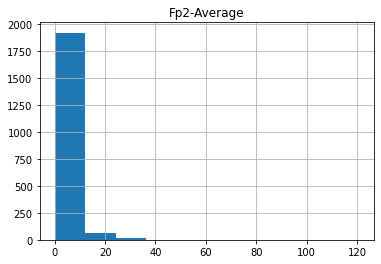

In [55]:
df_alpha.hist('Fp2-Average')

In [40]:
df_alpha.to_csv('./data/alpha.csv')
df_beta1.to_csv('./data/beta1.csv')
df_beta2.to_csv('./data/beta2.csv')
df_gamma.to_csv('./data/gamma.csv')
df_delta.to_csv('./data/delta.csv')
df_theta.to_csv('./data/theta.csv')

In [41]:
df_alpha.drop(['File'] ,axis=1)

,Fp2-Average,Fp1-Average,F8-Average,F7-Average,F4-Average,F3-Average,A2-Average,A1-Average,T4-Average,T3-Average,...,C3-Average,T6-Average,T5-Average,P4-Average,P3-Average,O2-Average,O1-Average,Fz-Average,Cz-Average,Pz-Average
0,4.161662,4.762865,7.246639,6.059806,2.153202,1.572805,15.029756,16.500593,9.567035,9.234154,...,2.114502,9.567035,9.234154,20.851299,17.095161,22.880400,21.152048,1.129518,2.255890,18.627159
1,3.518199,3.455632,3.530721,4.234659,1.874174,1.394773,7.810439,7.423106,3.998484,5.838541,...,7.372659,3.998484,5.838541,15.995101,12.378187,9.849713,10.086205,1.926195,1.696814,10.556301
2,4.161534,4.762608,7.246819,6.059433,2.153255,1.572751,15.029181,16.498966,9.566912,9.233415,...,2.114394,9.566912,9.233415,20.850815,17.094631,22.879755,21.151377,1.129460,2.255825,18.626675
3,5.457887,5.320032,8.166045,6.673810,2.488945,1.680824,28.949177,30.896576,10.956245,10.512586,...,8.001479,10.956245,10.512586,23.326231,14.537515,37.609566,34.657375,1.417634,1.887176,12.033745
4,1.742927,2.237509,2.294245,3.200365,1.093216,1.116978,4.283130,5.306987,4.650280,3.518667,...,1.983116,4.650280,3.518667,4.448735,3.272606,5.652241,4.659122,0.588387,0.652448,4.443384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998,1.200484,1.107137,1.795225,2.269453,0.590614,0.737258,3.494191,3.470459,2.716809,2.794697,...,0.839728,2.716809,2.794697,2.281852,1.980693,2.849909,2.740643,0.329811,0.333317,1.711145
1999,2.152215,2.203316,2.492165,3.222685,1.146153,1.023774,6.332191,7.495187,3.771545,4.962333,...,1.435344,3.771545,4.962333,5.415292,5.249610,17.260777,15.197314,0.444608,0.521218,4.416704
2000,3.269129,2.987093,3.276003,2.860202,0.866453,0.895220,14.854268,16.295338,5.452332,5.863682,...,2.855283,5.452332,5.863682,18.183191,19.696339,49.208736,56.667461,0.310272,0.948803,14.722844
2001,3.216888,3.785900,2.597943,2.204316,1.109382,1.076722,10.479017,9.797897,5.450221,4.791178,...,1.795023,5.450221,4.791178,12.239549,8.647070,19.454445,15.349119,0.547038,0.689619,8.316186


In [42]:
df_alpha.dtypes
#df_beta2.dtypes

File            object
Fp2-Average    float64
Fp1-Average    float64
F8-Average     float64
F7-Average     float64
F4-Average     float64
F3-Average     float64
A2-Average     float64
A1-Average     float64
T4-Average     float64
T3-Average     float64
C4-Average     float64
C3-Average     float64
T6-Average     float64
T5-Average     float64
P4-Average     float64
P3-Average     float64
O2-Average     float64
O1-Average     float64
Fz-Average     float64
Cz-Average     float64
Pz-Average     float64
dtype: object

In [43]:
#df_alpha['Fp2-Average'].astype(str).astype(int)
#int(df_alpha['Fp2-Average'].replace(',', ''))